In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
df = pd.read_csv('my_movies.csv')
df

V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [5]:
df.shape

(10, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [7]:
df2=df.iloc[:,5:]
df2

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [17]:
import warnings 
warnings.filterwarnings('ignore')

Apriori Algorithm

1) Association rules with 10% support and 70% confidence

In [18]:
#10% support
ar1=apriori(df2,min_support=0.1,use_colnames=True)
ar1

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (Sixth Sense, LOTR2)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Sixth Sense, Green Mile)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Braveheart, Gladiator)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (LOTR1, Harry Potter1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter2, Harry Potter1)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (LOTR, Green Mile)
30      0.4                  (Sixth Sense, Patriot, Gladiator)
31      0.1                     (LOTR, Sixth Sense, Gladiator)
32      0.1               (Sixth Sense, Green Mile, Gladiator)
33      0.1                (Sixth Sense, LOTR1, Harry Potter1)
34      0.1                        (Sixth Sense, LOTR1, LOTR2)
35      0.1                   (Sixth Sense, Green Mile, LOTR1)
36      0.1                (Sixth Sense, LOTR2, Harry Potter1)
37      0.1           (Sixth Sense, Green Mile, Harry Potter1)
38      0.1                   (Sixth Sense, Green Mile, LOTR2)
39      0.1                    (LOTR, Sixth Sense, Green Mile)
40      0.1                   (Braveheart, Patriot, Gladiator)
41      0.1                      (LOTR, Green Mile, Gladiator)
42      0.1                      (LOTR2, LOTR1, Harry Potter1)
43      0.1                 (Green Mile, LOTR1, Harry Potter1)
44      0.1                         (Green Mile, LOTR1, LOTR2)
45      0.1                 (LOTR2, Green Mile, Harry Potter1)
46      0.1         (LOTR, Sixth Sense, Green Mile, Gladiator)
47      0.1         (Sixth Sense, LOTR2, LOTR1, Harry Potter1)
48      0.1    (Sixth Sense, Green Mile, LOTR1, Harry Potter1)
49      0.1            (Sixth Sense, Green Mile, LOTR1, LOTR2)
50      0.1    (Sixth Sense, LOTR2, Green Mile, Harry Potter1)
51      0.1          (LOTR2, Green Mile, LOTR1, Harry Potter1)
52      0.1  (Green Mile, Harry Potter1, Sixth Sense, LOTR1...

In [19]:
#70% confidence
rules=association_rules(ar1,metric='lift',min_threshold=0.7)
rules

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                          (LOTR1)   
3            (LOTR1)                                    (Sixth Sense)   
4      (Sixth Sense)                                  (Harry Potter1)   
..               ...                                              ...   
245     (Green Mile)       (Sixth Sense, LOTR2, LOTR1, Harry Potter1)   
246  (Harry Potter1)          (Sixth Sense, Green Mile, LOTR1, LOTR2)   
247    (Sixth Sense)        (LOTR2, Green Mile, LOTR1, Harry Potter1)   
248          (LOTR1)  (Sixth Sense, LOTR2, Green Mile, Harry Potter1)   
249          (LOTR2)  (Sixth Sense, Green Mile, LOTR1, Harry Potter1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.2      0.1    0.166667  0.833333   
3                   0.2                 0.6      0.1    0.500000  0.833333   
4                   0.6                 0.2      0.1    0.166667  0.833333   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.2                 0.1      0.1    0.500000  5.000000   
247                 0.6                 0.1      0.1    0.166667  1.666667   
248                 0.2                 0.1      0.1    0.500000  5.000000   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  zhangs_metric  
0        0.08        1.80       0.400000  
1        0.08        1.40       0.533333  
2       -0.02        0.96      -0.333333  
3       -0.02        0.80      -0.200000  
4       -0.02        0.96      -0.333333  
..        ...         ...            ...  
245      0.08        1.80       1.000000  
246      0.08        1.80       1.000000  
247      0.04        1.08       1.000000  
248      0.08        1.80       1.000000  
249      0.08        1.80       1.000000  

[250 rows x 10 columns]

In [20]:
#lift ratio>1 is used
rules[rules.lift>1]

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
6      (Sixth Sense)                                        (Patriot)   
7          (Patriot)                                    (Sixth Sense)   
10            (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
245     (Green Mile)       (Sixth Sense, LOTR2, LOTR1, Harry Potter1)   
246  (Harry Potter1)          (Sixth Sense, Green Mile, LOTR1, LOTR2)   
247    (Sixth Sense)        (LOTR2, Green Mile, LOTR1, Harry Potter1)   
248          (LOTR1)  (Sixth Sense, LOTR2, Green Mile, Harry Potter1)   
249          (LOTR2)  (Sixth Sense, Green Mile, LOTR1, Harry Potter1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
6                   0.6                 0.6      0.4    0.666667  1.111111   
7                   0.6                 0.6      0.4    0.666667  1.111111   
10                  0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.2                 0.1      0.1    0.500000  5.000000   
247                 0.6                 0.1      0.1    0.166667  1.666667   
248                 0.2                 0.1      0.1    0.500000  5.000000   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  zhangs_metric  
0        0.08        1.80       0.400000  
1        0.08        1.40       0.533333  
6        0.04        1.20       0.250000  
7        0.04        1.20       0.250000  
10       0.04         inf       0.444444  
..        ...         ...            ...  
245      0.08        1.80       1.000000  
246      0.08        1.80       1.000000  
247      0.04        1.08       1.000000  
248      0.08        1.80       1.000000  
249      0.08        1.80       1.000000  

[236 rows x 10 columns]

In [21]:
#visualization
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')

Text(0, 0.5, 'confidence')

2) Association rules with 5% support and 90% confidence

In [22]:
#5% support
ar2=apriori(df2,min_support=0.05,use_colnames=True)
ar2

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Sixth Sense, Harry Potter1)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (Sixth Sense, LOTR2)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Sixth Sense, Green Mile)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Braveheart, Gladiator)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (LOTR1, Harry Potter1)
22      0.2                                     (LOTR1, LOTR2)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (LOTR2, Harry Potter1)
25      0.1                     (Harry Potter2, Harry Potter1)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (LOTR, Green Mile)
30      0.4                  (Sixth Sense, Patriot, Gladiator)
31      0.1                     (LOTR, Sixth Sense, Gladiator)
32      0.1               (Sixth Sense, Green Mile, Gladiator)
33      0.1                (Sixth Sense, LOTR1, Harry Potter1)
34      0.1                        (Sixth Sense, LOTR1, LOTR2)
35      0.1                   (Sixth Sense, Green Mile, LOTR1)
36      0.1                (Sixth Sense, LOTR2, Harry Potter1)
37      0.1           (Sixth Sense, Green Mile, Harry Potter1)
38      0.1                   (Sixth Sense, Green Mile, LOTR2)
39      0.1                    (LOTR, Sixth Sense, Green Mile)
40      0.1                   (Braveheart, Patriot, Gladiator)
41      0.1                      (LOTR, Green Mile, Gladiator)
42      0.1                      (LOTR2, LOTR1, Harry Potter1)
43      0.1                 (Green Mile, LOTR1, Harry Potter1)
44      0.1                         (Green Mile, LOTR1, LOTR2)
45      0.1                 (LOTR2, Green Mile, Harry Potter1)
46      0.1         (LOTR, Sixth Sense, Green Mile, Gladiator)
47      0.1         (Sixth Sense, LOTR2, LOTR1, Harry Potter1)
48      0.1    (Sixth Sense, Green Mile, LOTR1, Harry Potter1)
49      0.1            (Sixth Sense, Green Mile, LOTR1, LOTR2)
50      0.1    (Sixth Sense, LOTR2, Green Mile, Harry Potter1)
51      0.1          (LOTR2, Green Mile, LOTR1, Harry Potter1)
52      0.1  (Green Mile, Harry Potter1, Sixth Sense, LOTR1...

In [23]:
#90% confidence
rules2=association_rules(ar2,metric='lift',min_threshold=0.9)
rules2

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                        (Patriot)   
3          (Patriot)                                    (Sixth Sense)   
4             (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
233     (Green Mile)       (Sixth Sense, LOTR2, LOTR1, Harry Potter1)   
234  (Harry Potter1)          (Sixth Sense, Green Mile, LOTR1, LOTR2)   
235    (Sixth Sense)        (LOTR2, Green Mile, LOTR1, Harry Potter1)   
236          (LOTR1)  (Sixth Sense, LOTR2, Green Mile, Harry Potter1)   
237          (LOTR2)  (Sixth Sense, Green Mile, LOTR1, Harry Potter1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.2                 0.1      0.1    0.500000  5.000000   
235                 0.6                 0.1      0.1    0.166667  1.666667   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  zhangs_metric  
0        0.08        1.80       0.400000  
1        0.08        1.40       0.533333  
2        0.04        1.20       0.250000  
3        0.04        1.20       0.250000  
4        0.04         inf       0.444444  
..        ...         ...            ...  
233      0.08        1.80       1.000000  
234      0.08        1.80       1.000000  
235      0.04        1.08       1.000000  
236      0.08        1.80       1.000000  
237      0.08        1.80       1.000000  

[238 rows x 10 columns]

In [24]:
rules2[rules2.lift>1]

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                        (Patriot)   
3          (Patriot)                                    (Sixth Sense)   
4             (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
233     (Green Mile)       (Sixth Sense, LOTR2, LOTR1, Harry Potter1)   
234  (Harry Potter1)          (Sixth Sense, Green Mile, LOTR1, LOTR2)   
235    (Sixth Sense)        (LOTR2, Green Mile, LOTR1, Harry Potter1)   
236          (LOTR1)  (Sixth Sense, LOTR2, Green Mile, Harry Potter1)   
237          (LOTR2)  (Sixth Sense, Green Mile, LOTR1, Harry Potter1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.6      0.4    0.666667  1.111111   
3                   0.6                 0.6      0.4    0.666667  1.111111   
4                   0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
233                 0.2                 0.1      0.1    0.500000  5.000000   
234                 0.2                 0.1      0.1    0.500000  5.000000   
235                 0.6                 0.1      0.1    0.166667  1.666667   
236                 0.2                 0.1      0.1    0.500000  5.000000   
237                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  zhangs_metric  
0        0.08        1.80       0.400000  
1        0.08        1.40       0.533333  
2        0.04        1.20       0.250000  
3        0.04        1.20       0.250000  
4        0.04         inf       0.444444  
..        ...         ...            ...  
233      0.08        1.80       1.000000  
234      0.08        1.80       1.000000  
235      0.04        1.08       1.000000  
236      0.08        1.80       1.000000  
237      0.08        1.80       1.000000  

[236 rows x 10 columns]

Text(0, 0.5, 'confidence')

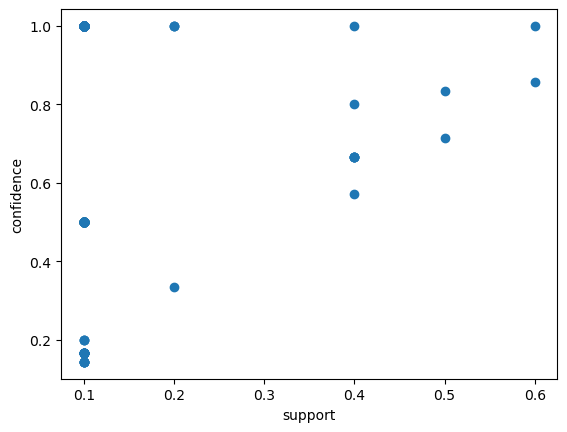

In [25]:
#visualization
plt.scatter(rules2['support'],rules2['confidence']);
plt.xlabel('support')
plt.ylabel('confidence')